In [1]:
!pip install --upgrade gdown

import gdown
import zipfile

file_id = "18pI0FdziEH-pm-eyf49dbqI062OYwIrJ"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_zip = "Dataset.zip"

gdown.download(download_url, output_zip, quiet=False)

with zipfile.ZipFile(output_zip, "r") as zip_ref:
    zip_ref.extractall("plastic_dataset")

print("Dataset downloaded and extracted to 'plastic_dataset' folder.")


Downloading...
From (original): https://drive.google.com/uc?id=18pI0FdziEH-pm-eyf49dbqI062OYwIrJ
From (redirected): https://drive.google.com/uc?id=18pI0FdziEH-pm-eyf49dbqI062OYwIrJ&confirm=t&uuid=cb8ea9da-d138-4f59-b37e-642a0156db4f
To: /content/Dataset.zip
100%|██████████| 186M/186M [00:03<00:00, 55.3MB/s]


Dataset downloaded and extracted to 'plastic_dataset' folder.


In [2]:
import os

# List all items (including folders and files) in plastic_dataset
print("plastic_dataset contents:", os.listdir('plastic_dataset'))

# List all items in plastic_images (should show your files/folders)
print("plastic_images contents:", os.listdir('plastic_dataset/plastic_images'))


plastic_dataset contents: ['plastic_annotation', 'plastic_images']
plastic_images contents: ['plastic_images']


In [3]:
image_folder = 'plastic_dataset/plastic_images/plastic_images'


In [4]:
for root, dirs, files in os.walk('plastic_dataset'):
    for file in files:
        if file.lower().endswith(('.jpg','.jpeg','.png')):
            print(os.path.join(root, file))


plastic_dataset/plastic_images/plastic_images/dc_plastic_000065_NRkSZPKR.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000049_kpGAfuhx.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000035_ZTa940zI.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000064_BTTPGrYi.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000011_ivDUJgCA.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000015_VFhQRsOV.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000041_4WPTKNjc.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000057_1lgwf9Mp.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000062_dk7BmLef.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000044_yNGPwH4G.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000040_JdwIj3QC.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000068_UNZOfV6a.jpg
plastic_dataset/plastic_images/plastic_images/dc_plastic_000014_0ZQvgsAb.jpg

In [5]:
image_folder = 'plastic_dataset/plastic_images/plastic_images'
img_list = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg','.jpeg','.png'))]

print("Total images:", len(img_list))
print("First 5 images:", img_list[:5])


Total images: 71
First 5 images: ['dc_plastic_000065_NRkSZPKR.jpg', 'dc_plastic_000049_kpGAfuhx.jpg', 'dc_plastic_000035_ZTa940zI.jpg', 'dc_plastic_000064_BTTPGrYi.jpg', 'dc_plastic_000011_ivDUJgCA.jpg']


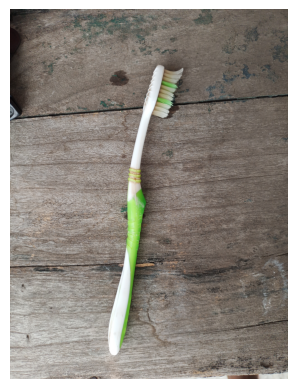

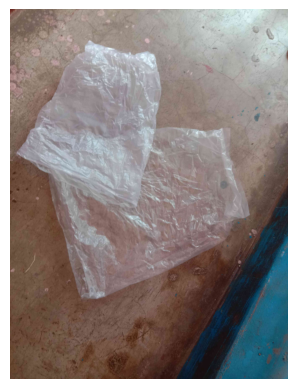

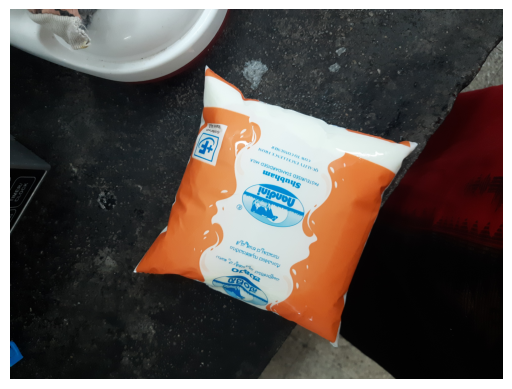

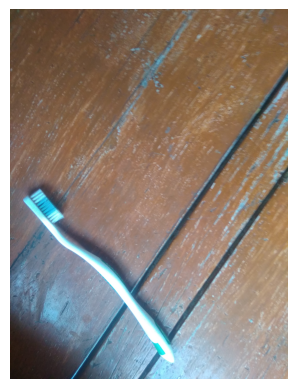

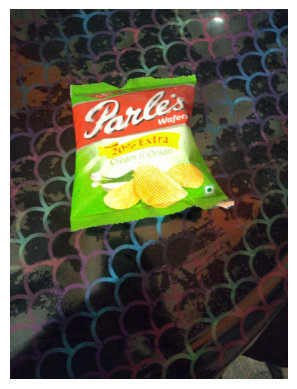

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import os

for i in range(5):
    img_path = os.path.join(image_folder, img_list[i])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()



In [ ]:
import os

annotation_folder = 'plastic_dataset/plastic_annotation'
annotation_files = os.listdir(annotation_folder)
print("Total annotation files:", len(annotation_files))
print("First 5 annotation files:", annotation_files[:5])


Total annotation files: 1
First 5 annotation files: ['plastic_annotation']


In [7]:
import os

annotation_folder = 'plastic_dataset/plastic_annotation/plastic_annotation'
annotation_files = os.listdir(annotation_folder)

print("Total annotation files:", len(annotation_files))
print("First 5 annotation files:", annotation_files[:5])

file_path = os.path.join(annotation_folder, annotation_files[0])
with open(file_path, 'r') as f:
    data = f.read()
print(data[:500])  # Print first 500 characters to inspect the structure


Total annotation files: 70
First 5 annotation files: ['dc_plastic_000034_yTc8ToTd.xml', 'dc_plastic_000016_ceTnQFul.xml', 'dc_plastic_000061_z1ngjdlz.xml', 'dc_plastic_000025_RFAKG2Ce.xml', 'dc_plastic_000002_Cbz9fzUQ.xml']
<annotation>
  <folder>dc</folder>
  <filename>dc_plastic_000034_yTc8ToTd.jpg</filename>
  <source>
    <database>Unknown</database>
    <annotation>Unknown</annotation>
    <image>Unknown</image>
  </source>
  <size>
    <width>3024</width>
    <height>4032</height>
    <depth></depth>
  </size>
  <segmented>0</segmented>
  <object>
    <name>plastic</name>
    <truncated>0</truncated>
    <occluded>0</occluded>
    <difficult>0</difficult>
    <bndbox>
      <xmin>553.72</xmin>
      <ymin>891


In [8]:
import os
import xml.etree.ElementTree as ET

annotation_folder = 'plastic_dataset/plastic_annotation/plastic_annotation'
annotation_files = os.listdir(annotation_folder)

# Example: Parse first annotation file
file_path = os.path.join(annotation_folder, annotation_files[0])
tree = ET.parse(file_path)
root = tree.getroot()

# Get image filename
filename = root.find('filename').text

# Get object details
for obj in root.findall('object'):
    label = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = float(bndbox.find('xmin').text)
    ymin = float(bndbox.find('ymin').text)
    xmax = float(bndbox.find('xmax').text) if bndbox.find('xmax') is not None else None
    ymax = float(bndbox.find('ymax').text) if bndbox.find('ymax') is not None else None
    print(f"Filename: {filename}, Label: {label}, BoundingBox: ({xmin}, {ymin}), ({xmax}, {ymax})")


Filename: dc_plastic_000034_yTc8ToTd.jpg, Label: plastic, BoundingBox: (553.72, 891.51), (2352.56, 2747.32)


In [9]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

annotation_folder = 'plastic_dataset/plastic_annotation/plastic_annotation'
annotation_files = os.listdir(annotation_folder)

data_list = []

for ann_file in annotation_files:
    file_path = os.path.join(annotation_folder, ann_file)
    tree = ET.parse(file_path)
    root = tree.getroot()
    filename = root.find('filename').text
    for obj in root.findall('object'):
        label = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = float(bndbox.find('xmin').text)
        ymin = float(bndbox.find('ymin').text)
        xmax = float(bndbox.find('xmax').text) if bndbox.find('xmax') is not None else None
        ymax = float(bndbox.find('ymax').text) if bndbox.find('ymax') is not None else None
        data_list.append([filename, label, xmin, ymin, xmax, ymax])

# Convert to DataFrame
df = pd.DataFrame(data_list, columns=['filename', 'label', 'xmin', 'ymin', 'xmax', 'ymax'])
print(df.head())


                         filename    label     xmin    ymin     xmax     ymax
0  dc_plastic_000034_yTc8ToTd.jpg  plastic   553.72  891.51  2352.56  2747.32
1  dc_plastic_000016_ceTnQFul.jpg  plastic   809.43  381.99  2377.84  3956.40
2  dc_plastic_000061_z1ngjdlz.jpg  plastic  1014.28  549.19  1398.60  2822.45
3  dc_plastic_000025_RFAKG2Ce.jpg  plastic   903.36  627.16  2094.90  1741.83
4  dc_plastic_000002_Cbz9fzUQ.jpg  plastic   508.25    0.00  1712.14  2990.45


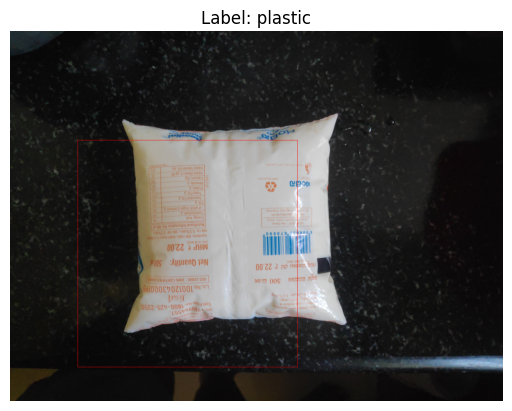

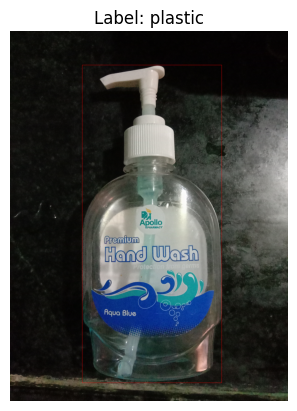

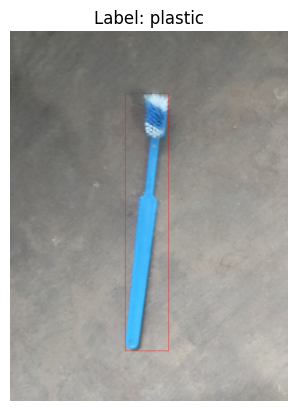

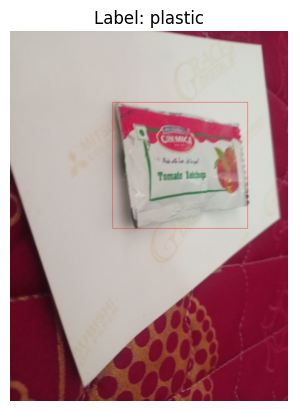

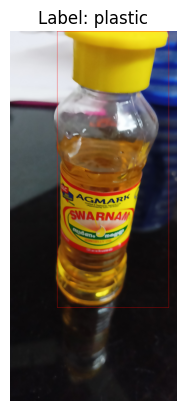

In [10]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

image_folder = 'plastic_dataset/plastic_images/plastic_images'

for i in range(5):  # Display first 5 images with bounding boxes
    row = df.iloc[i]
    img_path = os.path.join(image_folder, row['filename'])
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)
    # Draw box
    draw.rectangle([row['xmin'], row['ymin'], row['xmax'], row['ymax']], outline='red', width=3)
    plt.imshow(img)
    plt.title(f"Label: {row['label']}")
    plt.axis('off')
    plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Split based on unique filenames to avoid data leakage
unique_files = df['filename'].unique()
train_files, test_files = train_test_split(unique_files, test_size=0.2, random_state=42)

# Create train and test DataFrame subsets
train_df = df[df['filename'].isin(train_files)].reset_index(drop=True)
test_df = df[df['filename'].isin(test_files)].reset_index(drop=True)

print("Training samples:", len(train_df))
print("Testing samples:", len(test_df))


Training samples: 61
Testing samples: 15


In [14]:
import os
import shutil

os.makedirs('yolo_dataset/images/val', exist_ok=True)

# Move uploaded files to validation images folder
for filename in uploaded.keys():
    shutil.move(filename, f'yolo_dataset/images/val/{filename}')


In [15]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17564, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 17564 (delta 35), reused 7 (delta 7), pack-reused 17508 (from 3)
Receiving objects: 100% (17564/17564), 16.64 MiB | 25.54 MiB/s, done.
Resolving deltas: 100% (12029/12029), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.0 MB/s eta 0:00:00


In [16]:
!pip install --upgrade gdown

import gdown
import zipfile

file_id = "18pI0FdziEH-pm-eyf49dbqI062OYwIrJ"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_zip = "Dataset.zip"

gdown.download(download_url, output_zip, quiet=False)

with zipfile.ZipFile(output_zip, "r") as zip_ref:
    zip_ref.extractall("plastic_dataset")

print("Dataset downloaded and extracted to 'plastic_dataset' folder.")


Downloading...
From (original): https://drive.google.com/uc?id=18pI0FdziEH-pm-eyf49dbqI062OYwIrJ
From (redirected): https://drive.google.com/uc?id=18pI0FdziEH-pm-eyf49dbqI062OYwIrJ&confirm=t&uuid=03bfec92-3d5a-464e-a001-cb37a4fd24a8
To: /content/yolov5/Dataset.zip
100%|██████████| 186M/186M [00:03<00:00, 61.3MB/s]


Dataset downloaded and extracted to 'plastic_dataset' folder.


In [17]:
custom_data = """
train: ../yolo_dataset/images/train
val: ../yolo_dataset/images/val

nc: 1
names: ['plastic']
"""

with open('custom_data.yaml', 'w') as f:
    f.write(custom_data)


In [18]:
import os
from PIL import Image

def convert_to_yolo(df, img_folder, save_folder):
    os.makedirs(save_folder, exist_ok=True)
    grouped = df.groupby('filename')
    for filename, group in grouped:
        img_path = os.path.join(img_folder, filename)
        img = Image.open(img_path)
        img_width, img_height = img.size
        txt_filename = os.path.splitext(filename)[0] + '.txt'
        txt_path = os.path.join(save_folder, txt_filename)

        with open(txt_path, 'w') as f:
            for _, row in group.iterrows():
                x_center = ((row['xmin'] + row['xmax']) / 2) / img_width
                y_center = ((row['ymin'] + row['ymax']) / 2) / img_height
                width = (row['xmax'] - row['xmin']) / img_width
                height = (row['ymax'] - row['ymin']) / img_height
                f.write(f"0 {x_center} {y_center} {width} {height}\n")  # '0' is class index for plastic


In [19]:

import os

# Paths for label folders where YOLO txt labels will be saved
label_train_folder = 'yolo_dataset/labels/train'
label_val_folder = 'yolo_dataset/labels/val'

# Paths for images copied into YOLOv5 format
image_train_folder = 'yolo_dataset/images/train'
image_val_folder = 'yolo_dataset/images/val'

# Create all necessary directories if they don't exist
os.makedirs(label_train_folder, exist_ok=True)
os.makedirs(label_val_folder, exist_ok=True)
os.makedirs(image_train_folder, exist_ok=True)
os.makedirs(image_val_folder, exist_ok=True)

print(f"Directories ensured:\n{label_train_folder}\n{label_val_folder}\n{image_train_folder}\n{image_val_folder}")

Directories ensured:
yolo_dataset/labels/train
yolo_dataset/labels/val
yolo_dataset/images/train
yolo_dataset/images/val


In [20]:
import os

print("yolo_dataset contents:", os.listdir('yolo_dataset'))
# If there are subfolders
for root, dirs, files in os.walk('yolo_dataset'):
    print("Root:", root)
    for d in dirs:
        print(" - Dir:", d)
    for f in files[:5]:  # Show sample files
        print("   * File:", f)


yolo_dataset contents: ['labels', 'images']
Root: yolo_dataset
 - Dir: labels
 - Dir: images
Root: yolo_dataset/labels
 - Dir: train
 - Dir: val
Root: yolo_dataset/labels/train
Root: yolo_dataset/labels/val
Root: yolo_dataset/images
 - Dir: train
 - Dir: val
Root: yolo_dataset/images/train
Root: yolo_dataset/images/val


In [21]:
image_train_folder = 'yolo_dataset/images/train'
image_val_folder = 'yolo_dataset/images/val'
label_train_folder = 'yolo_dataset/labels/train'
label_val_folder = 'yolo_dataset/labels/val'


In [22]:
import os

# Get all present image filenames in train and val folders
existing_train_images = set(os.listdir(image_train_folder))
existing_val_images = set(os.listdir(image_val_folder))

# Filter train/test df to only include images that exist in relevant folders
filtered_train_df = train_df[train_df['filename'].isin(existing_train_images)].reset_index(drop=True)
filtered_test_df = test_df[test_df['filename'].isin(existing_val_images)].reset_index(drop=True)

# Convert only for images that are present
convert_to_yolo(filtered_train_df, image_train_folder, label_train_folder)
convert_to_yolo(filtered_test_df, image_val_folder, label_val_folder)

In [23]:
import shutil
import os

original_image_folder = 'plastic_dataset/plastic_images/plastic_images'

# Copy training images based on train_df (unfiltered)
for img_file in train_df['filename'].unique():
    src = os.path.join(original_image_folder, img_file)
    dst = os.path.join('yolo_dataset/images/train', img_file)
    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"Missing train file: {src}")

# Copy validation images based on test_df (unfiltered)
for img_file in test_df['filename'].unique():
    src = os.path.join(original_image_folder, img_file)
    dst = os.path.join('yolo_dataset/images/val', img_file)
    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"Missing val file: {src}")


In [24]:
print("Train images after copy:", os.listdir('yolo_dataset/images/train')[:5])
print("Val images after copy:", os.listdir('yolo_dataset/images/val')[:5])


Train images after copy: ['dc_plastic_000049_kpGAfuhx.jpg', 'dc_plastic_000064_BTTPGrYi.jpg', 'dc_plastic_000011_ivDUJgCA.jpg', 'dc_plastic_000015_VFhQRsOV.jpg', 'dc_plastic_000041_4WPTKNjc.jpg']
Val images after copy: ['dc_plastic_000065_NRkSZPKR.jpg', 'dc_plastic_000035_ZTa940zI.jpg', 'dc_plastic_000062_dk7BmLef.jpg', 'dc_plastic_000040_JdwIj3QC.jpg', 'dc_plastic_000022_egKBsm2a.jpg']


In [25]:

custom_data = """
train: yolo_dataset/images/train
val: yolo_dataset/images/val
nc: 1
names: ['plastic']
"""
with open('custom_data.yaml', 'w') as f:
    f.write(custom_data)

In [26]:
convert_to_yolo(train_df, original_image_folder, 'yolo_dataset/labels/train')
convert_to_yolo(test_df, original_image_folder, 'yolo_dataset/labels/val')


In [27]:
import os
print("Train labels files:", os.listdir('yolo_dataset/labels/train')[:10])


Train labels files: ['dc_plastic_000026_Bi49EY8a.txt', 'dc_plastic_000047_gvtD3ib7.txt', 'dc_plastic_000009_sQWHZRn1.txt', 'dc_plastic_000044_yNGPwH4G.txt', 'dc_plastic_000027_N8ftvaPG.txt', 'dc_plastic_000008_yoLvadEZ.txt', 'dc_plastic_000021_zV4DE7hY.txt', 'dc_plastic_000037_EuO7DasC.txt', 'dc_plastic_000033_sEot12In.txt', 'dc_plastic_000023_SgXjxffS.txt']


In [28]:
!python train.py --img 640 --batch 16 --epochs 30 --data custom_data.yaml --weights yolov5s.pt --cache


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-09-05 14:24:59.727615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757082299.752428    2297 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757082299.760473    2297 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [30]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.15 --source yolo_dataset/images/val --project runs/detect --name val_results --exist-ok


detect: weights=['runs/train/exp/weights/best.pt'], source=yolo_dataset/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.15, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=val_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/14 /content/yolov5/yolo_dataset/images/val/dc_plastic_000002_Cbz9fzUQ.jpg: 640x288 2 plastics, 175.5ms
image 2/14 /content/yolov5/yolo_dataset/images/val/dc_plastic_000010_TleUeK2v.jpg: 640x480 3 plastics, 271.2ms
image 3/14 /content/yolov5/yolo_dataset/images/val/dc_plastic_000022_egKBsm2a.jpg: 640x480 8 plastics, 26

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

results_folder = 'runs/detect/val_results'
images = [f for f in os.listdir(results_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for image in images[:5]:
    img_path = os.path.join(results_folder, image)
    img = Image.open(img_path)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(image)
    plt.show()


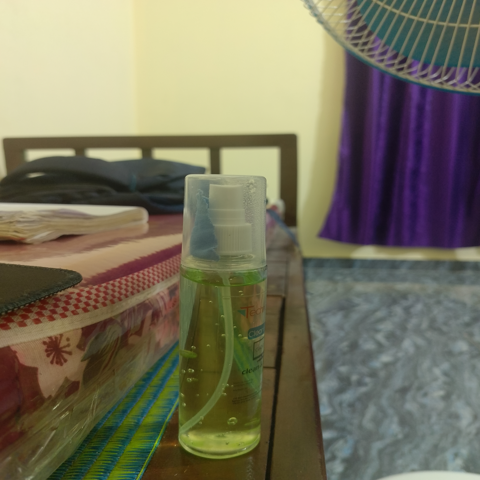

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


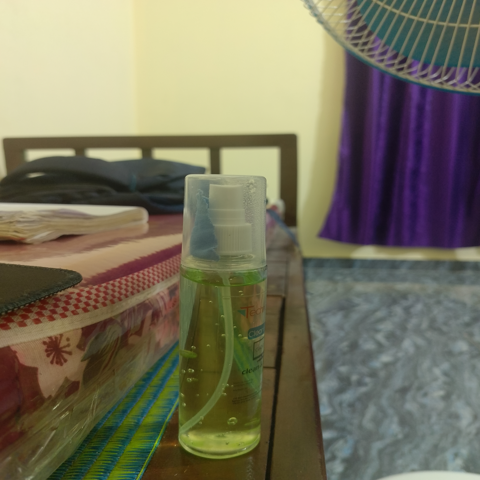

No objects detected. Try uploading an image with plastic objects similar to the training data.


In [ ]:
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import torch

# Load your trained YOLOv5 model (adjust the path to your weights file)
model = torch.hub.load("ultralytics/yolov5", "custom", path="runs/train/exp3/weights/best.pt", force_reload=True)

# Create a file upload widget that accepts image files
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

def on_upload_change(change):
    clear_output(wait=True)
    for name, file_info in upload_widget.value.items():
        img_bytes = file_info['content']
        img = Image.open(io.BytesIO(img_bytes)).convert("RGB")

        # Display uploaded image resized
        img_resized = img.resize((480, 480))
        display(img_resized)

        # Run inference
        results = model(img)

        # Get detection results as PIL image
        result_img = Image.fromarray(results.render()[0])

        # Resize detection output for display
        result_resized = result_img.resize((480, 480))
        display(result_resized)

        # If no detections, print message
        if len(results.xyxy[0]) == 0:
            print("No objects detected. Try uploading an image with plastic objects similar to the training data.")



# Set the function to trigger upon file upload
upload_widget.observe(on_upload_change, names='value')

# Display instructions and the upload widget
display(widgets.HTML("<h2>Upload an image to detect plastic waste</h2>"))
display(upload_widget)


In [13]:
# This cell is added to define the 'uploaded' variable to avoid the NameError
# It simulates the output of a file upload widget when no files have been uploaded.
uploaded = {}